# Descriptive statistics for circular data
We will explore how to compute descriptive statistics for circular data using the Pyriodic package, and illustrate why we need special methods for circular data.

First, we import the necessary Python modules:

In [1]:
import numpy as np

from pyriodic import Circular

First, lets illustrate the need for special methods for descriptive statistics for circular data, first lets compute the arthmetric mean of angles 359 and 1 degree.

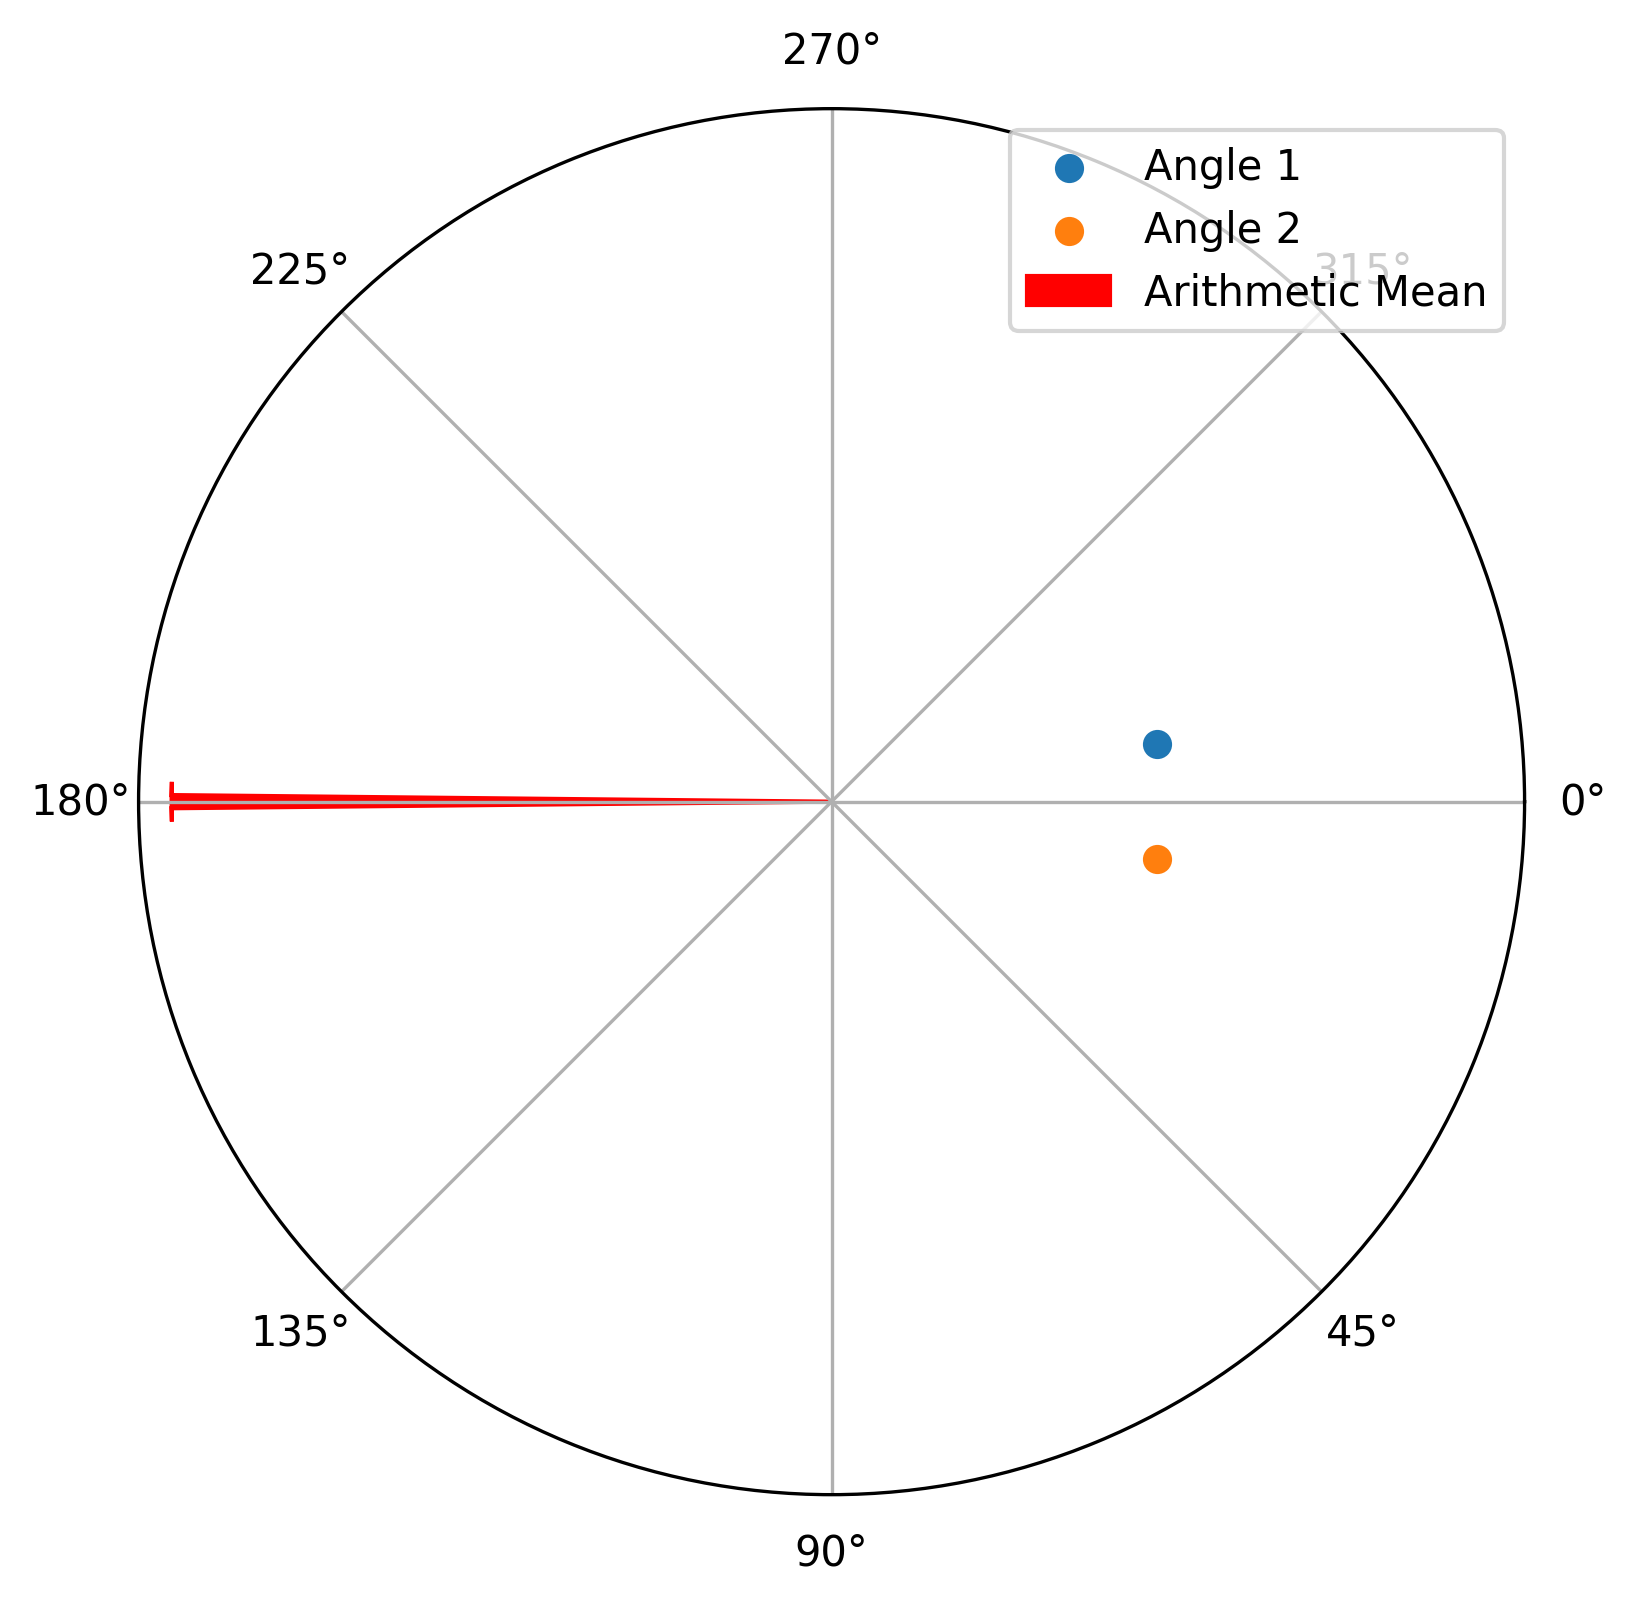

In [2]:
angle_example = np.array([350, 10])

circ = Circular(angle_example, unit="degrees", labels=["Angle 1", "Angle 2"])

plot = circ.plot(group_by_labels=True)
plot.add_arrows(angles = [np.mean(circ.data)], color="red", label="Arithmetic Mean")
plot.ticks_to_degrees()
plot.add_legend()
plot.show()

This simple example shows, that as the arithmetic mean does not account for the wrap-around of the circular data, it gives a misleading result. If we however compute the circular mean angle, we get a more intuitive result. The circular mean is computed by averaging the sine and cosine of the angles, which accounts for the circular nature of the data.

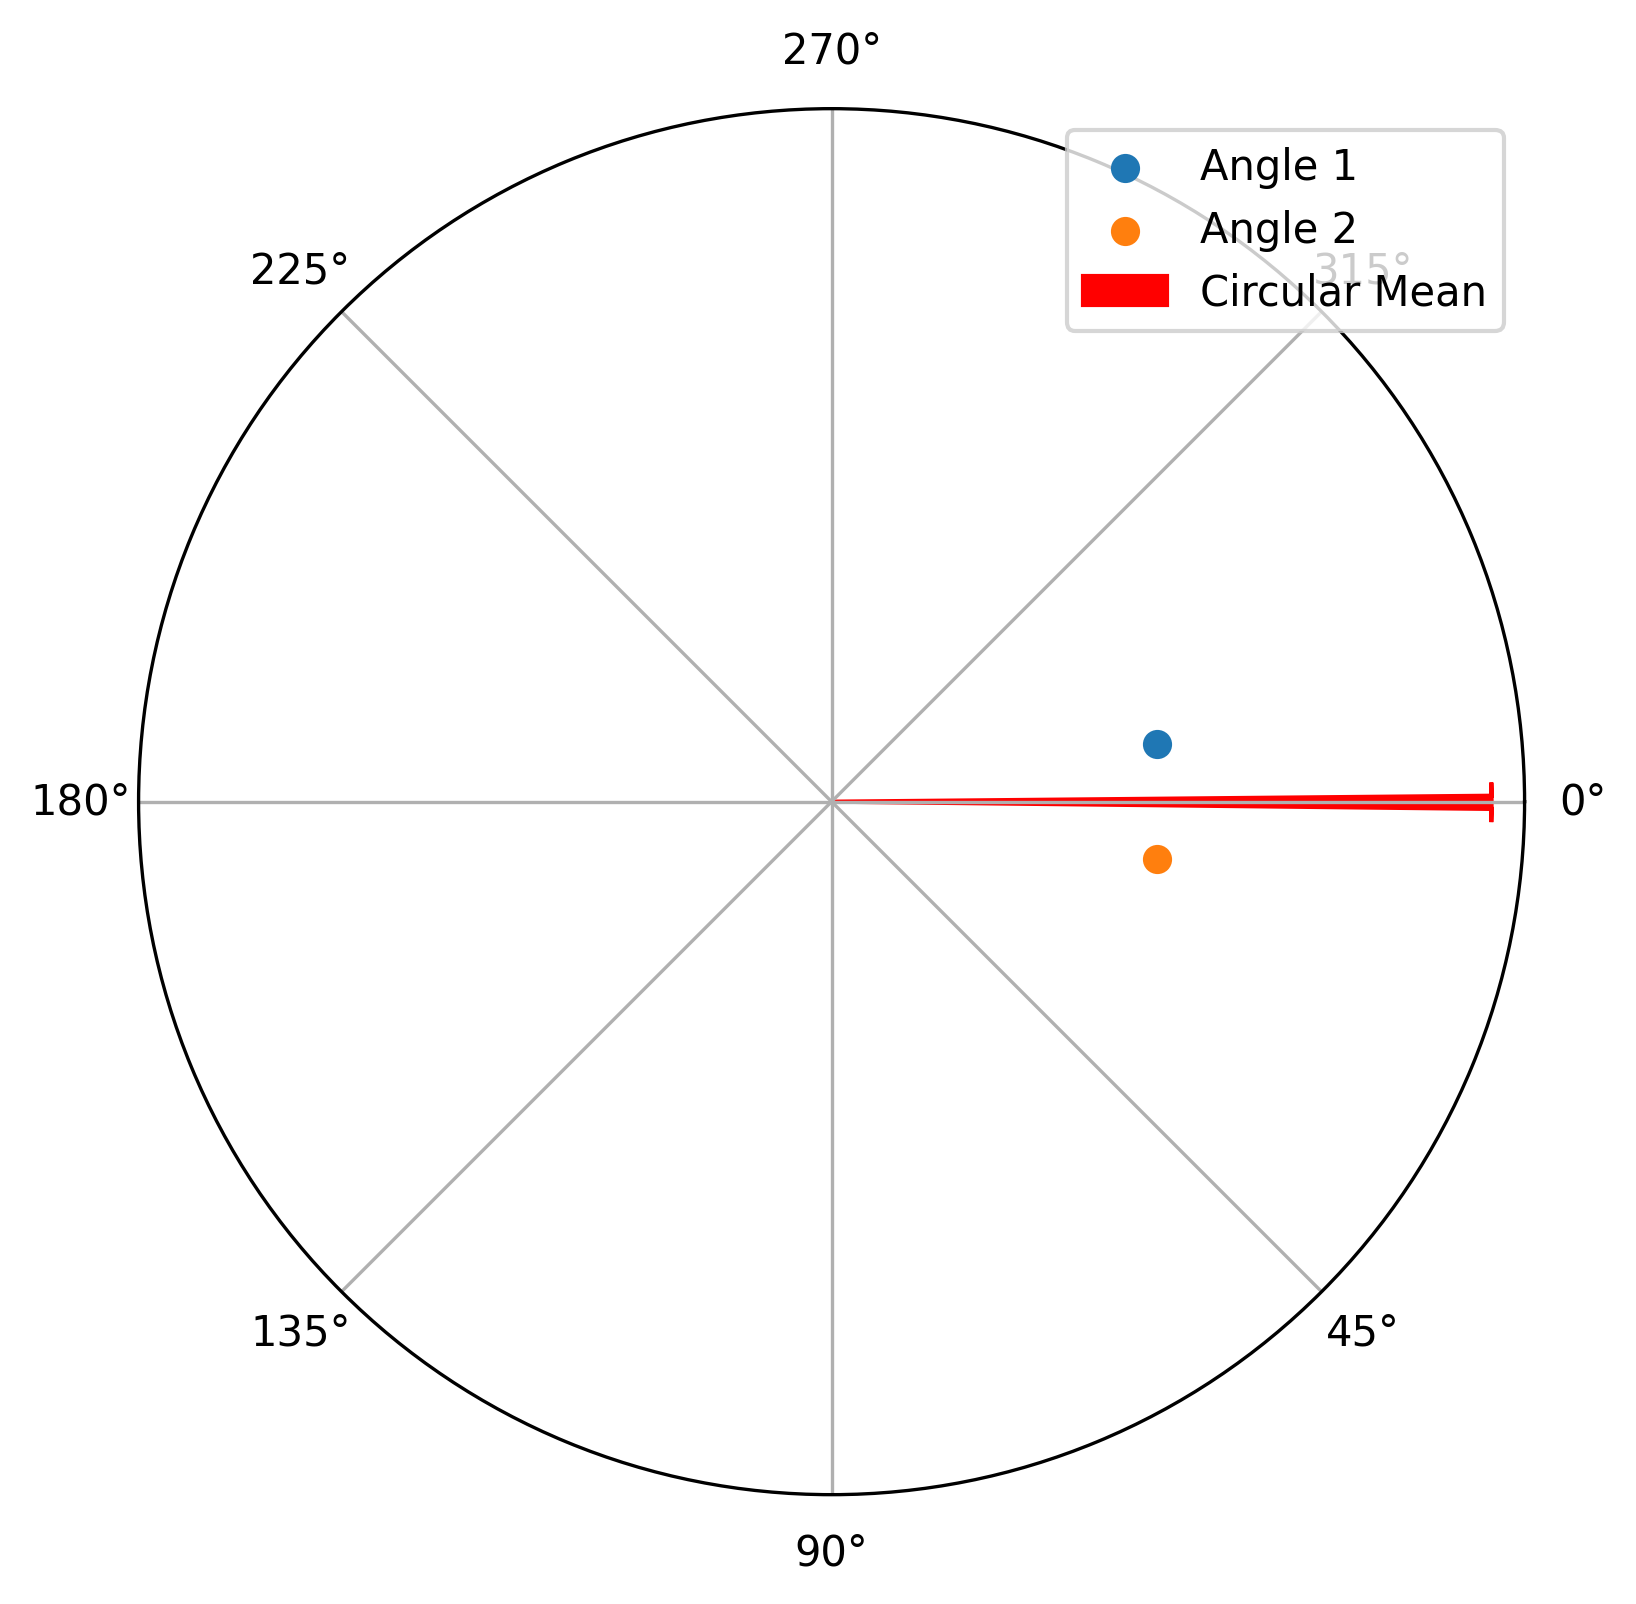

In [3]:
plot = circ.plot(group_by_labels=True)
plot.add_arrows(angles = [circ.mean()], color="red", label="Circular Mean")
plot.ticks_to_degrees()
plot.add_legend()
plot.show()

Now, lets generate a larger dataset. To have a sample data set, we will generate a set of angles from a von Mises distribution. The von Mises distribution is the circular analogue of the normal distribution, and is often used to model circular data. We will generate 300 angles with a mean of 0 radians and a concentration parameter of 5. The concentration parameter controls how tightly the angles cluster around the mean; higher values indicate tighter clustering.

In [4]:
data = np.random.vonmises(mu=0, kappa=5, size=300)

We will now create a `Circular` object from the generated data. The `Circular` class in Pyriodic is designed to handle circular data and provides methods for computing descriptive statistics, plotting, and more.

As the `Circular` class expects data in the range of 0 to 2pi we can use the full_range parameter to specify the range


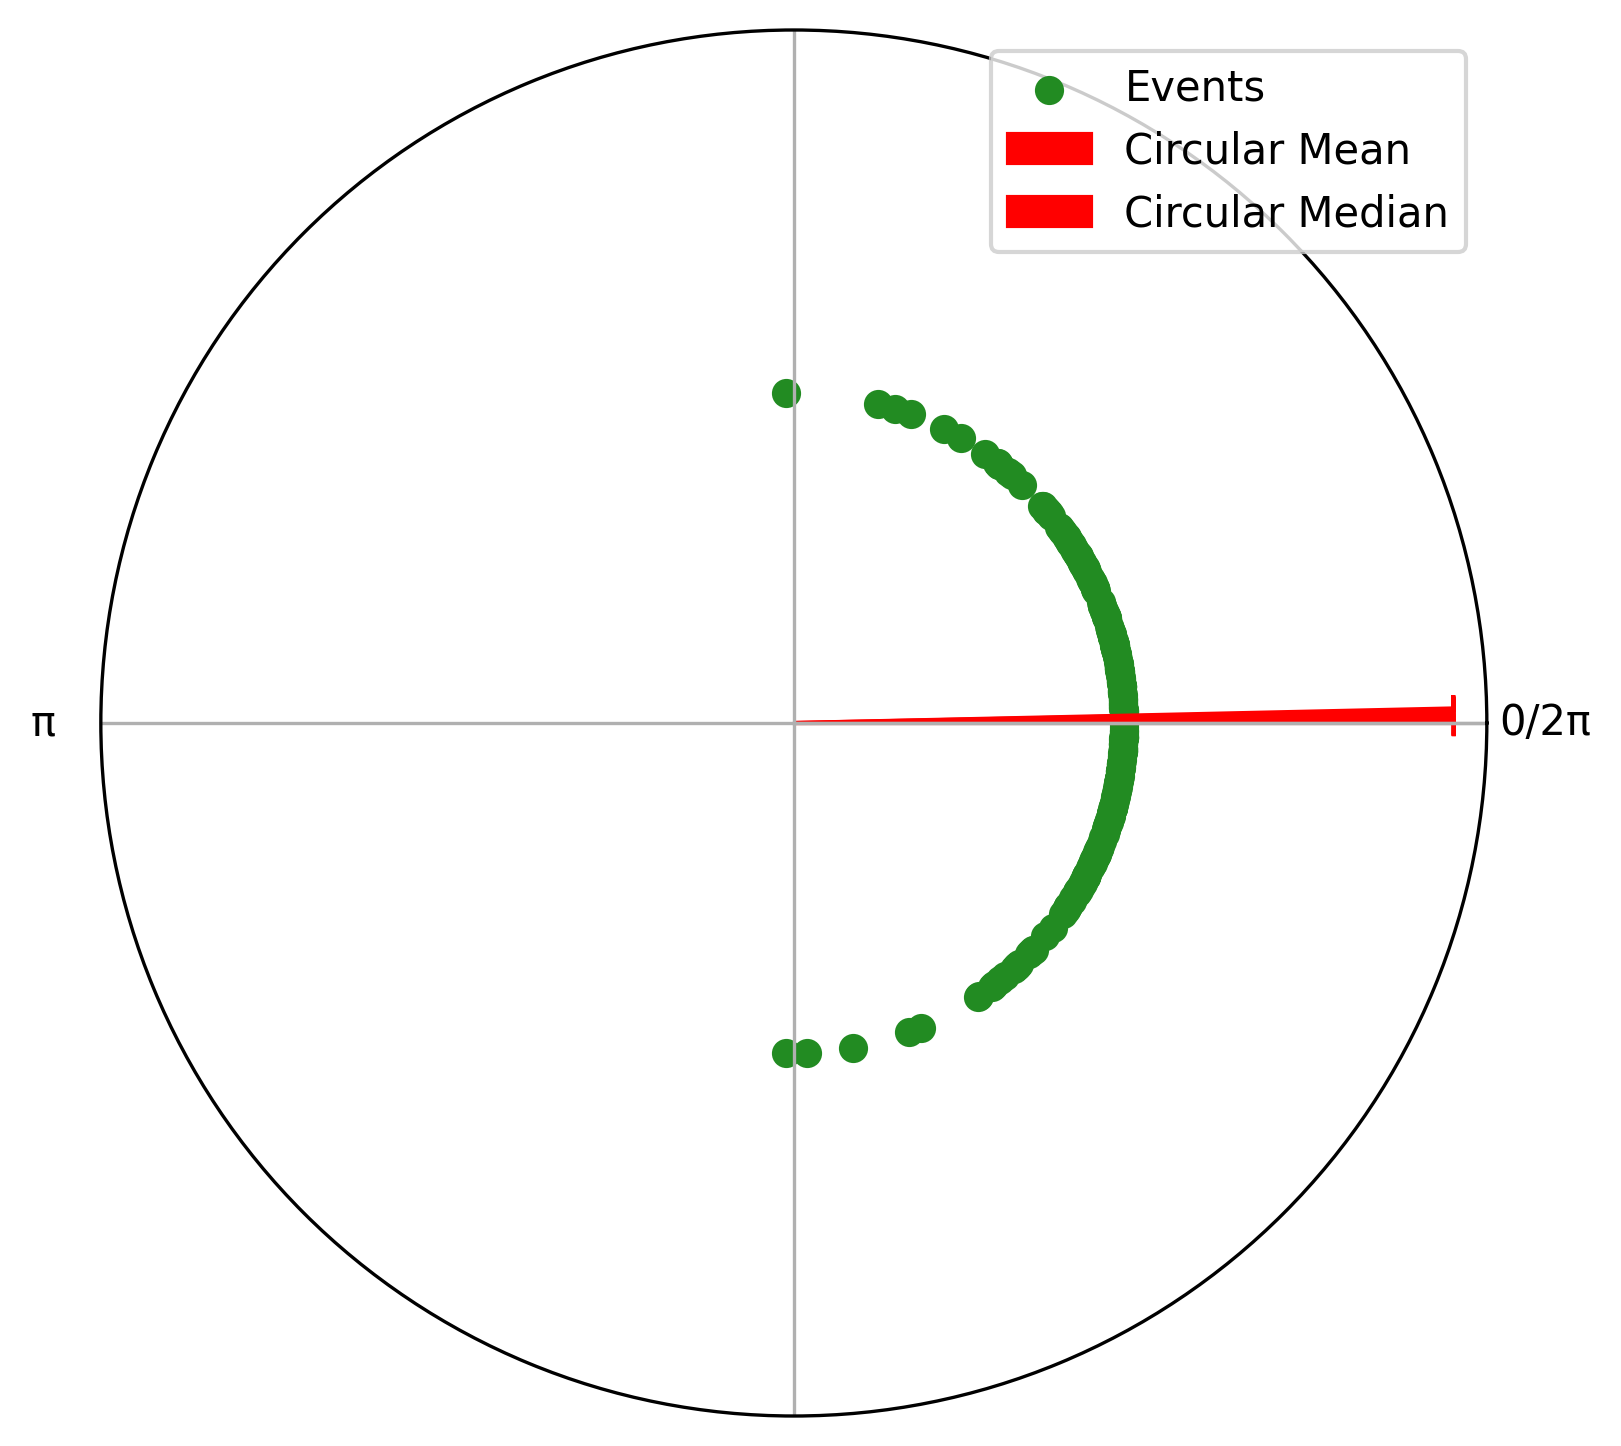

In [5]:
circ_data = Circular(data, full_range=(-np.pi, np.pi))
plot = circ_data.plot()
plot.add_arrows(angles=[circ_data.mean(), circ_data.median()], color="red", labels=["Circular Mean", "Circular Median"])
plot.add_legend()